# Generate a dataset of observations, labels from two circuits

The following code aims at:

- Building a Parametrized Quantum Circuit "A", providing a set of parameters as data, and setting the related labels to "one" for all parametrizations.
- Building a Parametrized Quantum Circuit "B", providing a set of parameters as data, and setting the related labels to "zero" for all parametrizations.
- Generated an encoded dataset having a row for each parameter set related tu circuit A and for each parameter set related tu circuit B. Each row contains a value for each expected value of a set of observables like (XII,IXI,IIX,YII,IYI,IIY,ZII,IZI,IIZ)

In [ ]:
import sys
import os

# Add the parent directory to import pqk
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

# required imports
from pqk.QEncoding import QEncoding
from qiskit.circuit.library import EfficientSU2, TwoLocal
import numpy as np
from pqk.aux_funcs import generate_my_obs
import pandas as pd

In [4]:
# number of qubits of the circuits
num_qubits=3

In [5]:
# The first circuit is generated as an EfficientSU2, from the qiskit library. Could be whatever quantum circuit.
circuit_A=EfficientSU2(num_qubits,reps=1)
num_params_A=circuit_A.num_parameters
print(f"Number of parameters of circuit A: {num_params_A}")

# Generation of a set of random parameters for the circuit A
rng = np.random.default_rng(seed=42)    # random generator
data_length_A=100                       # number of random parameters generated

data_A=rng.random((data_length_A,num_params_A))*np.pi*2 # generate the parameter set
label_A=np.ones((data_length_A))                        # generate a label vector of "1", identifying the circuit_A

# Wrap all in a dictionary
dataset_A={"circuit":circuit_A,"data":data_A}

print("\n")
print("Head of data (parameter sets) for circuit A:")
print(dataset_A["data"][1:10])

print("\n")
print("Head of corresponding labels")
print(label_A[1:10])


Number of parameters of circuit A: 12


Head of data (parameter sets) for circuit A:
[[4.04552386 5.16956368 2.78605358 1.427783   3.48455899 0.40097565
  5.20016002 3.96886447 4.76320575 2.22755235 6.09907556 5.61164551]
 [4.89072775 1.22295107 2.93249455 0.27522718 0.96942947 4.29172315
  4.67947864 6.07904294 2.0472211  2.32766698 2.95030617 1.19048366]
 [0.81632089 2.9889422  1.42571349 4.20856545 2.74670651 5.23187141
  4.3998954  1.96265749 5.22924256 5.05648359 2.43459846 1.81161891]
 [4.28824572 0.87809075 1.25606028 0.04625851 4.94439169 4.17738113
  4.43068475 4.90546518 2.88345286 3.57350633 0.87837044 0.71961368]
 [4.19969967 2.95998476 3.5514832  4.80662958 3.98805282 3.47824196
  3.51360222 1.90977479 0.19363417 2.74397628 1.34827526 2.56686117]
 [5.36208965 1.46988514 0.36632693 1.76798714 1.84470399 4.15894412
  3.49993624 4.92537771 4.17400508 2.55340396 5.11464092 1.0491218 ]
 [0.14270416 0.5657874  4.53871766 2.90206023 1.01330047 3.14815717
  0.95700517 4.37510995 2

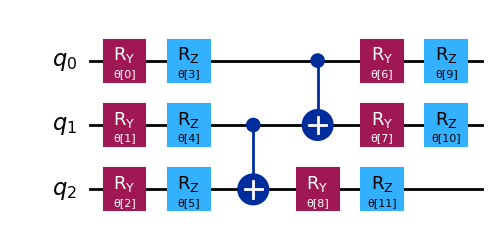

In [6]:
# the circuit A
circuit_A.decompose().draw("mpl")

In [7]:
# Same for circuit B, using the TwoLocal structure from qiskit library
circuit_B=TwoLocal(num_qubits, 'ry', 'cx', 'circular', reps=1, insert_barriers=True)
circuit_B.decompose().draw("mpl")
num_params_B=circuit_B.num_parameters
print(num_params_B)
rng = np.random.default_rng(seed=53)
data_length_B=100
data_B=rng.random((data_length_B,num_params_B))*np.pi*2
label_B=np.zeros((data_length_B)) # all labels set to Zero
dataset_B={"circuit":circuit_B,"data":data_B}
label_B[1:10]

6


array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

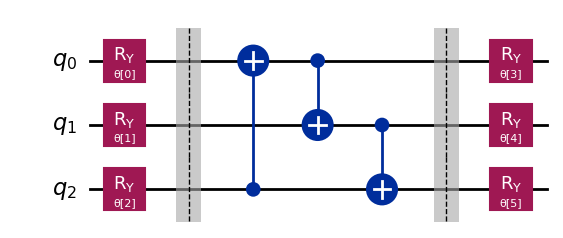

In [8]:
circuit_B.decompose().draw("mpl")

In [9]:
# groups the datasets
datasets=[dataset_A,dataset_B]
labels=[label_A,label_B]

In [10]:
# Exploiting QEncodingMC
from pqk.QEncodingMC import QEncodingMC

obs = generate_my_obs(['X','Y','Z'], n_qub=3)
print(f'Observations: used to project quantum states: {obs}')

q_enc=QEncodingMC(qcs= [(circuit_A,data_A),(circuit_B,data_B)], obs = obs,use_pe = 'sv')

encoded=q_enc.encode()



Observations: used to project quantum states: ['XII', 'IXI', 'IIX', 'YII', 'IYI', 'IIY', 'ZII', 'IZI', 'IIZ']
[(<qiskit.circuit.library.n_local.efficient_su2.EfficientSU2 object at 0x0000022BC89C07A0>, array([[4.86290927, 2.75755456, 5.39472984, ..., 2.82985831, 2.3297927 ,
        5.82303616],
       [4.04552386, 5.16956368, 2.78605358, ..., 2.22755235, 6.09907556,
        5.61164551],
       [4.89072775, 1.22295107, 2.93249455, ..., 2.32766698, 2.95030617,
        1.19048366],
       ...,
       [0.92277206, 5.40857203, 5.17184446, ..., 4.72702198, 3.1678476 ,
        4.71406023],
       [2.91966827, 2.31161114, 1.37720646, ..., 5.17173772, 2.50389096,
        6.2227942 ],
       [0.86212376, 4.10631183, 2.81945065, ..., 4.12223376, 1.81636571,
        4.61641415]])), (<qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x0000022BF8A3F320>, array([[6.99129688e-02, 4.51704886e+00, 2.08053350e+00, 5.86276898e+00,
        6.58633482e-01, 4.18734491e+00],
       [5.14752424e+00,

In [11]:
q_enc.get_encoding(labels)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

,0,1,2,3,4,5,6,7,8,label
0,-0.902704,-0.038917,0.215881,0.324881,0.075956,0.164768,0.147603,-0.263651,-0.065896,1.0
1,0.373597,0.006405,-0.158107,-0.220313,-0.062036,0.550075,0.299052,0.384158,-0.316670,1.0
2,-0.035591,0.057597,0.113940,-0.263022,0.000719,-0.138196,0.228249,0.050073,0.036842,1.0
3,-0.911989,0.442874,-0.180960,0.153891,-0.404239,0.635392,0.356442,0.322249,-0.187484,1.0
4,0.734784,0.269167,-0.337786,-0.050667,0.090474,-0.159679,-0.067383,-0.134613,0.189421,1.0
...,...,...,...,...,...,...,...,...,...,...
195,-0.752562,-0.075074,0.372928,0.000000,0.000000,0.000000,-0.128675,0.436128,-0.437094,0.0
196,0.678494,0.570458,0.555323,0.000000,0.000000,0.000000,0.726371,0.062154,-0.157822,0.0
197,-0.598483,0.031220,0.031186,0.000000,0.000000,0.000000,0.427373,0.027489,-0.038253,0.0
198,-0.195050,0.034153,-0.706244,0.000000,0.000000,0.000000,0.571292,0.464598,0.212672,0.0


In [12]:
q_enc.save_encoding(y_labels=labels,file_name="qencoding_mc_test.csv")

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

,0,1,2,3,4,5,6,7,8,label
0,-0.902704,-0.038917,0.215881,0.324881,0.075956,0.164768,0.147603,-0.263651,-0.065896,1.0
1,0.373597,0.006405,-0.158107,-0.220313,-0.062036,0.550075,0.299052,0.384158,-0.316670,1.0
2,-0.035591,0.057597,0.113940,-0.263022,0.000719,-0.138196,0.228249,0.050073,0.036842,1.0
3,-0.911989,0.442874,-0.180960,0.153891,-0.404239,0.635392,0.356442,0.322249,-0.187484,1.0
4,0.734784,0.269167,-0.337786,-0.050667,0.090474,-0.159679,-0.067383,-0.134613,0.189421,1.0
...,...,...,...,...,...,...,...,...,...,...
195,-0.752562,-0.075074,0.372928,0.000000,0.000000,0.000000,-0.128675,0.436128,-0.437094,0.0
196,0.678494,0.570458,0.555323,0.000000,0.000000,0.000000,0.726371,0.062154,-0.157822,0.0
197,-0.598483,0.031220,0.031186,0.000000,0.000000,0.000000,0.427373,0.027489,-0.038253,0.0
198,-0.195050,0.034153,-0.706244,0.000000,0.000000,0.000000,0.571292,0.464598,0.212672,0.0


In [11]:
# # old test
#
# #generate obs
# obs = generate_my_obs(['X','Y','Z'], n_qub=3)
# print(f'Observations: used to project quantum states: {obs}')
#
#
# datasets_enc=None
# for dataset, label in zip(datasets,labels):
#     q_enc = QEncoding(data=dataset["data"], obs=obs, qcircuit=dataset["circuit"])
#     en = q_enc.encode()
#     print(label)
#     datasets_enc=pd.concat([datasets_enc,q_enc.get_encoding(label)])
#     #datasets_enc.append(q_enc.get_encoding(dataset["labels"]))
#
# datasets_enc.to_csv("qencoding_mc_test.csv", index=False)
#
# datasets_enc

Observations: used to project quantum states: ['XII', 'IXI', 'IIX', 'YII', 'IYI', 'IIY', 'ZII', 'IZI', 'IIZ']
Encoding 100 data point
End data encoding
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
Encoding 100 data point
End data encoding
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


,0,1,2,3,4,5,6,7,8,label
0,-0.902704,-0.038917,0.215881,0.324881,0.075956,0.164768,0.147603,-0.263651,-0.065896,1.0
1,0.373597,0.006405,-0.158107,-0.220313,-0.062036,0.550075,0.299052,0.384158,-0.316670,1.0
2,-0.035591,0.057597,0.113940,-0.263022,0.000719,-0.138196,0.228249,0.050073,0.036842,1.0
3,-0.911989,0.442874,-0.180960,0.153891,-0.404239,0.635392,0.356442,0.322249,-0.187484,1.0
4,0.734784,0.269167,-0.337786,-0.050667,0.090474,-0.159679,-0.067383,-0.134613,0.189421,1.0
...,...,...,...,...,...,...,...,...,...,...
95,-0.752562,-0.075074,0.372928,0.000000,0.000000,0.000000,-0.128675,0.436128,-0.437094,0.0
96,0.678494,0.570458,0.555323,0.000000,0.000000,0.000000,0.726371,0.062154,-0.157822,0.0
97,-0.598483,0.031220,0.031186,0.000000,0.000000,0.000000,0.427373,0.027489,-0.038253,0.0
98,-0.195050,0.034153,-0.706244,0.000000,0.000000,0.000000,0.571292,0.464598,0.212672,0.0


In [12]:
# saves encoded dataset into a csv file
